# 1. Import and Install Dependencies

In [13]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.19.0rc0)
ERROR: No matching distribution found for tensorflow==2.4.1


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [128]:
'''Initializing MediaPipe modules below: 'holistic' for detecting full-body landmarks (face, hands, and pose),
and 'drawing_utils' for visualizing those landmarks on the image.'''
mp_detect = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils


In [129]:
def mediapipe_detection(image, model):
    '''This function handles the preprocessing necessary for Mediapipe models by converting the image from BGR to RGB format, 
    disabling write access to the image, and then converting it back to BGR after processing.'''
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results


In [130]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_detect.FACEMESH_TESSELATION) # Draw face landmarks
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_detect.POSE_CONNECTIONS) # Draw pose landmarks
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_detect.HAND_CONNECTIONS) # Draw left hand landmarks
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_detect.HAND_CONNECTIONS) # Draw right hand landmarks

In [131]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_detect.FACEMESH_TESSELATION, mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_detect.POSE_CONNECTIONS, mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_detect.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_detect.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)) 

In [134]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_detect.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Display screen
        cv2.imshow('OpenCV Feed', image)

        # Break the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

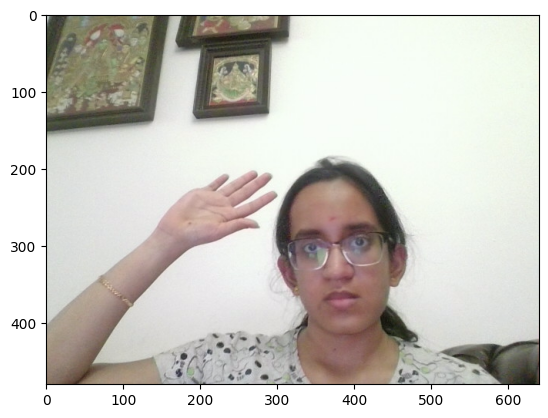

In [135]:
#Display singular frame
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [ ]:
# Collects each pose's landmarks at x, y, z coordinates and visibility score into a NumPy array and appends it to the pose list
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
''' Extracts landmark coordinates from MediaPipe results: If landmarks are detected, flatten them into a single vector; otherwise, use zero arrays of appropriate sizes.'''
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rignt_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [ ]:
def extract_keypoints(results):
    # Extracts landmark coordinates from MediaPipe arrays: If landmarks are detected, flatten them into a single vector; otherwise, use zero arrays of appropriate sizes.
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, left_hand, right_hand])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.55486983,  0.53886241, -0.73512661, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.55486983,  0.53886241, -0.73512661, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thankyou', 'iloveyou', 'yes', 'no', 'please'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30
start_folder = 30

In [ ]:
# Creation of folders and files for each action
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_detect.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Loop through actions
    for action in actions:
        # Loops through sequences
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # Draw landmarks
                draw_styled_landmarks(image, results)
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show screen
                    cv2.imshow('OpenCV Feed', image) 
                #Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                # Break
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break                 
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'hello': 0, 'thankyou': 1, 'iloveyou': 2, 'yes': 3, 'no': 4, 'please': 5}

In [ ]:
# Loads sequential frame data for each action and maps it to a numerical label
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(180, 30, 1662)

In [25]:
np.array(labels).shape

(180,)

In [26]:
X = np.array(sequences)

In [27]:
X.shape

(180, 30, 1662)

In [28]:
y = to_categorical(labels).astype(int)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [30]:
y_test.shape

(9, 6)

# 7. Build and Train LSTM Neural Network

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [48]:
log_dir = os.path.join('Logs4')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
# Defines a stacked LSTM-based sequential model for multi-class classification of video frames.
# The model processes temporal features (30 frames of 1662 values) and maps them to one of the actions using softmax.
# It uses 'tanh' for recurrent activations and 'adam' optimizer during training.
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(actions.shape[0], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 596,774 (2.28 MB)

 Trainable params: 596,774 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

In [138]:
class_weights = {0: 1., 1: 1.5, 2: 1.5, 3: 1., 4: 1.2, 5: 1.3}  # Example weights
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [139]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback], class_weight=class_weights)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5223 - loss: 1.7363
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4361 - loss: 1.6002
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7454 - loss: 0.6871
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7104 - loss: 0.9107
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8491 - loss: 0.6402
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8428 - loss: 0.4440
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8139 - loss: 0.5415
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9034 - loss: 0.3878
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8720 - loss: 0.4580
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9287 - loss: 0.3382
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9045 - loss: 0.3680
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7846 - lo

In [ ]:
# Model loading code, avoids unnecessary retraining

#from tensorflow.keras.models import load_model
#model = load_model('action(3).h5')

In [140]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,324 (6.83 MB)

 Trainable params: 596,774 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,550 (4.55 MB)

In [ ]:
import tensorflow as tf
# To avoid the error: "AttributeError: 'LSTM' object has no attribute 'time_major'"
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.LSTM):
        layer.time_major = False


In [ ]:
# Model configuration
for layer in model.layers:
    print(f"Layer: {layer.name}, Config: {layer.get_config()}")


Layer: lstm_15, Config: {'name': 'lstm_15', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': False, 'units': 64, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'seed': None, 'gain': 1.0}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint'

# 8. Make Predictions

In [100]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step


In [101]:
actions[np.argmax(res[4])]

'please'

In [102]:
actions[np.argmax(y_test[4])]

'please'

# 9. Save Weights

In [103]:
model.save('action(3).h5')

In [ ]:
# If needed, delete model to free up memory
# del model

In [104]:
model.load_weights('action(3).h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [105]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [106]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
# Creates Confusion Matrix
multilabel_confusion_matrix(ytrue, yhat)

array([[[8, 0],
        [0, 1]],

       [[8, 0],
        [0, 1]],

       [[7, 0],
        [0, 2]],

       [[8, 0],
        [0, 1]],

       [[7, 0],
        [0, 2]],

       [[7, 0],
        [0, 2]]], dtype=int64)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
# Converts predicted and true labels from one-hot encoding to integer labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
# Prints unique values in true and predicted labels, and the accuracy score
print("Unique values in true labels:", np.unique(y_test_labels))
print("Unique values in predicted labels:", np.unique(y_pred_classes))
print("Accuracy Score:", accuracy_score(y_test_labels, y_pred_classes))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Unique values in true labels: [0 1 2 3 4 5]
Unique values in predicted labels: [0 1 2 3 4 5]
Accuracy Score: 1.0


# 11. Test in Real Time

In [110]:
from scipy import stats

In [ ]:
import cv2
import numpy as np
colors = [
    (255, 99, 132),    # Soft Red
    (54, 162, 235),    # Soft Blue
    (75, 192, 192),    # Light Teal
    (153, 102, 255),   # Light Purple
    (241, 196, 15),    # Bright Yellow
    (46, 204, 113)     # Emerald Green
]
# Brighter colours are used for accessibility
# prob_viz function visualizes the probabilities of different actions in a horizontal bar chart format.
# It takes the model's predictions, the list of actions, the input frame, and a list of colors as inputs.
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        prob_value = prob if np.isscalar(prob) else prob[0]
        prob_value = max(0, min(prob_value, 1))
        col = colors[num % len(colors)]
        act = actions[num % len(actions)]
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob_value * 100), 90 + num * 40), col, -1)
        cv2.putText(output_frame, act, (10, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame


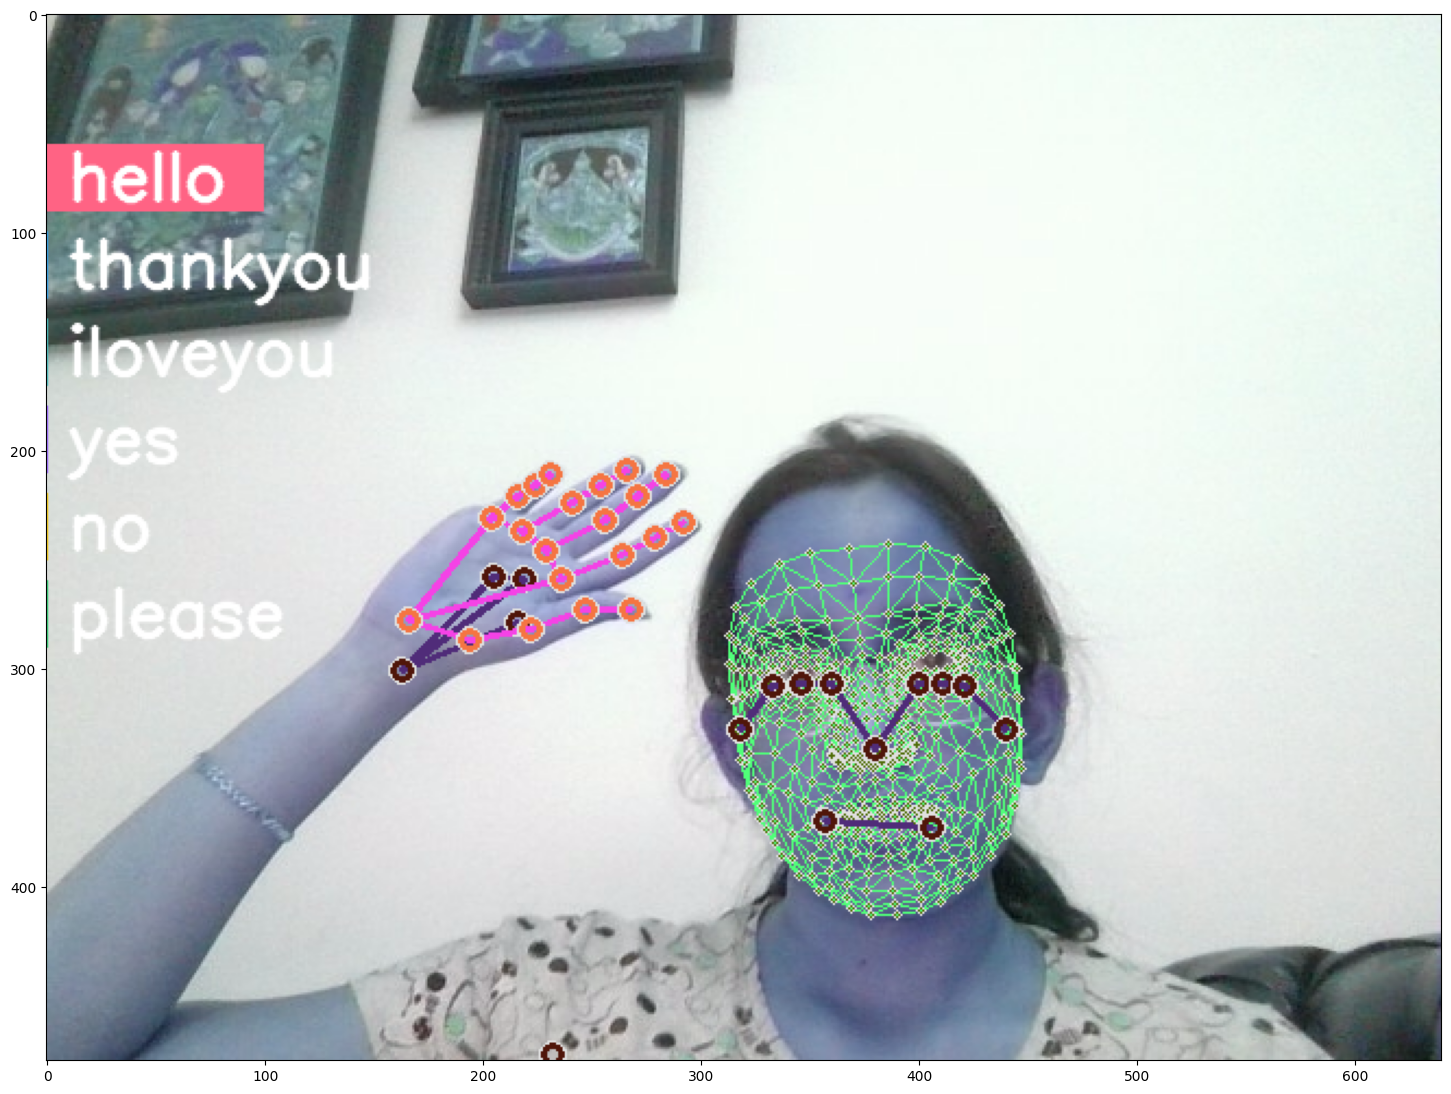

In [136]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [113]:
def check_and_extend_colors(res, colors):
    # Check if the number of colors is less than the number of actions
    if len(colors) < len(res):
        # Extend colors by repeating them if necessary
        print(f"Extending colors list. Current colors count: {len(colors)}, required: {len(res)}")
        # Repeat the colors list to match the length of res
        colors = colors * (len(res) // len(colors)) + colors[:len(res) % len(colors)]
    return colors

In [141]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_detect.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show screen
        cv2.imshow('OpenCV Feed', image)

        # Break 
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [143]:
import cv2
import numpy as np
import mediapipe as mp
import tkinter as tk
from PIL import Image, ImageTk

#Recreating the system within a GUI (Tkinter) for better usability and user experience

# Initialize Mediapipe Holistic model
mp_detect = mp.solutions.holistic
holistic = mp_detect.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize variables
sequence = []
sentence = []
predictions = []
threshold = 0.5
cap = cv2.VideoCapture(0)

# GUI setup
root = tk.Tk()
root.title("Sign Language Detection")

# Create a label for video feed
video_label = tk.Label(root)
video_label.pack()

# Create a label for detected text
text_label = tk.Label(root, text="Detected: ", font=("Helvetica", 16), fg="white", bg="black", width=50)
text_label.pack()

def update_frame():
    global sequence, sentence, predictions  

    ret, frame = cap.read()
    if not ret:
        root.after(10, update_frame)
        return  # Skip if frame is not captured

    # Convert frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Make detections
    image, results = mediapipe_detection(frame_rgb, holistic)
    draw_styled_landmarks(image, results)

    # Prediction logic
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-30:]

    if len(sequence) == 30:
        res = model.predict(np.expand_dims(sequence, axis=0))[0]
        predictions.append(np.argmax(res))

        if np.unique(predictions[-10:])[0] == np.argmax(res):
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5:
            sentence = sentence[-5:]

        # Visualize probabilities
        image = prob_viz(res, actions, image, colors)

    # Draw detection bar on image (like OpenCV)
    cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
    cv2.putText(image, ' '.join(sentence), (3, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Convert OpenCV image to Tkinter-compatible format
    image = Image.fromarray(image)
    image_tk = ImageTk.PhotoImage(image)

    # Keep a reference to avoid garbage collection
    video_label.image = image_tk
    video_label.config(image=image_tk)

    # Update text label with detected words
    text_label.config(text="Detected: " + ' '.join(sentence))

    # Schedule next frame update
    root.after(10, update_frame)

# Delay the first frame update slightly to prevent the error
root.after(100, update_frame)

# Start Tkinter GUI loop
root.mainloop()

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━

In [144]:
res[np.argmax(res)] > threshold
# The above code is a simple check to see if the predicted probability of the most likely action is greater than the threshold.
# If it is, it indicates that the model is confident enough in its prediction to consider it valid.

True